### Similarity

In statistics and related fields, a similarity measure or similarity function or similarity metric is a real-valued function that quantifies the similarity between two objects. Although no single definition of a similarity exists. Usually such measures are in some sense the inverse of distance metrics: they take on large values for similar objects and either zero or a negative value for very dissimilar objects. Though, in more broad terms, a similarity function may also satisfy metric axioms.

https://en.wikipedia.org/wiki/Similarity_measure

### Problem Statement

Implement Various similarity measures to check similarity between the text files.
The similarity measures implemented are :
   * jaccard index - set-based metric
   * euclidean similarity - distance based metric
   * cosine similarity - angular based metric

In [1]:
from nltk.tokenize import wordpunct_tokenize
import pandas as pd
import math

In [2]:
# Generating tokens using nltk library
def get_tokens(content):
    content = content.lower()
    Otokens = wordpunct_tokenize(content)
    Rtokens=[]
    for token in Otokens:
        # alphabetic tokens with length more than 1
        if(token.isalpha() and len(token)>1):
            Rtokens.append(token)
    return Rtokens

#### Jaccard index
The Jaccard index, also known as the Jaccard similarity coefficient, is a statistic used for gauging the similarity and diversity of sample sets.

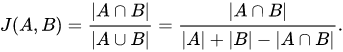

In [3]:
def Jaccard_score(set_a,set_b):
    return len(set_a & set_b)/len(set_a | set_b)

#### Euclidean distance

The basis of many measures of similarity and dissimilarity is euclidean distance. The distance between vectors X and Y is defined as follows:
* d = √[(x2 – x1)2 + (y2 – y1)2].
* In other words, euclidean distance is the square root of the sum of squared differences between corresponding elements of the two vectors

In [4]:
def Euclidean_distance(vector1,vector2):
    result_vector = [pow(vector1 - vector2,2) for vector1, vector2 in zip(vector1, vector2)]
    return math.sqrt(sum(result_vector))

#### Cosine similarity
cosine similarity is a measure of similarity between two sequences of numbers. For defining it, the sequences are viewed as vectors in an inner product space, and the cosine similarity is defined as the cosine of the angle between them, that is, the dot product of the vectors divided by the product of their lengths. It follows that the cosine similarity does not depend on the magnitudes of the vectors, but only on their angle


In [5]:
def Cosine_similarity(vector1,vector2):
    result_vector = [vector1 * vector2 for vector1, vector2 in zip(vector1, vector2)]
    mod_1 = [vector1 * vector1 for vector1, vector1 in zip(vector1, vector1)]
    mod_2 = [vector2 * vector2 for vector2, vector2 in zip(vector2, vector2)]
    cos_angle = sum(result_vector)/(math.sqrt(sum(mod_1)) * math.sqrt(sum(mod_2)))
    return cos_angle

In [6]:
# calculate vectors
def Calculate_vectors(set_a,set_b,tokens_a,tokens_b):
    vector_a=[]
    vector_b=[]
    common_tokens = set_a | set_b
    comm_lst = list(common_tokens)
    lst_a = list(tokens_a)
    lst_b = list(tokens_b)
    for token in common_tokens:
        vector_a.append(lst_a.count(token))
        vector_b.append(lst_b.count(token))
    return vector_a,vector_b

In [7]:
# read a file
def file_read(filename):
    with open(filename,'r',encoding='utf-8') as f:
        content = f.read()
        f.close()
    tokens = get_tokens(content)
    return tokens

In [8]:
def Print_result(file1,set1,file2,set2):
    print("similarity measures for : ",file1 ," and ",file2)
    
    # jaccard score
    jaccard_score = Jaccard_score(set1,set2)
    print("Jaccard score :",jaccard_score)
    
    vector_0,vector_1=Calculate_vectors(set1,set2,file_read(file1),file_read(file2))
    
    # Euclidean distance
    Edistance_similarity = Euclidean_distance(vector_0,vector_1)
    print("Euclidean distance :",Edistance_similarity)
    
    # cosine similariy
    Cos_similar = Cosine_similarity(vector_0,vector_1)
    print("Cosine similarity :",Cos_similar,"\n")

In [9]:
def main():
    # reading text files
    text_0_set = set(file_read('./Text_0.txt'))
    text_1_set = set(file_read('./Text_1.txt'))
    text_2_set = set(file_read('./Text_2.txt'))
    
    Print_result('./Text_0.txt',text_0_set,'./Text_2.txt',text_2_set)

In [10]:
if __name__ == "__main__":
    main()

similarity measures for :  ./Text_0.txt  and  ./Text_2.txt
Jaccard score : 0.11969111969111969
Euclidean distance : 43.02324952859791
Cosine similarity : 0.4039533839320047 

